In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.layers import Dropout, BatchNormalization
print(tf.__version__)

2.2.0


In [4]:
dataset = pd.read_csv("../data/train_validation_grouped_by_day.csv",index_col=0)
test = pd.read_csv("../data/test_grouped_by_day.csv",index_col=0)

#Stock market prices
y = dataset.iloc[:,10:13]
y_test = test.iloc[:,10:13]

#Rearrange so stock market prices are at the end
dataset = dataset.iloc[:,np.r_[:10,13:len(dataset.columns)]]
dataset = pd.concat([dataset,y],axis=1)

test = test.iloc[:,np.r_[:10,13:len(test.columns)]]
test = pd.concat([test,y_test],axis=1)

In [21]:
list(train_dataset)

['retweet_count',
 'favorite_count',
 'is_retweet',
 'hashtag_count',
 'mention_count',
 'word_count',
 'char_count',
 'word_density',
 'punctuation_freq',
 'upper_case_freq',
 'topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic9',
 'topic10',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '^GSPC',
 '^IXIC',
 'VGT']

In [30]:
train_dataset

,retweet_count,favorite_count,is_retweet,hashtag_count,mention_count,word_count,char_count,word_density,punctuation_freq,upper_case_freq,...,57,58,59,60,61,62,63,^GSPC,^IXIC,VGT
market_date,,,,,,,,,,,,,,,,,,,,,
2019-05-10,10719.357143,37912.190476,0.000000,0.000000,0.190476,37.261905,195.261905,5.277689,0.174045,0.047063,...,-0.120131,-0.023096,-0.042284,-0.058552,0.031299,-0.177001,0.058784,2881.399902,7916.939941,202.811295
2018-04-19,13649.900000,58518.700000,0.100000,0.300000,1.000000,30.400000,171.800000,5.730311,0.193687,0.049240,...,-0.140691,0.032219,-0.098025,-0.068693,0.017239,-0.133172,0.028903,2693.129883,7238.060059,170.318359
2019-10-25,14697.100000,34956.750000,0.000000,0.050000,0.500000,34.650000,183.500000,5.421858,0.186293,0.048752,...,-0.136549,-0.005516,-0.065343,-0.080538,0.048815,-0.181037,-0.001925,3022.550049,8243.120117,219.163239
2019-09-17,12048.863636,39756.863636,0.000000,0.227273,0.409091,25.909091,136.090909,5.423615,0.182792,0.072996,...,-0.087630,0.010655,-0.089670,-0.053215,0.021621,-0.179488,0.042504,3005.699951,8186.020020,214.804993
2017-06-16,24525.428571,101453.571429,0.000000,0.428571,0.428571,20.285714,102.571429,6.027193,0.255552,0.062443,...,-0.032961,-0.029269,-0.013370,-0.018417,0.005554,-0.145150,0.008310,2433.149902,6151.759766,136.372421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-26,8950.421053,22260.210526,0.000000,0.157895,0.368421,20.315789,113.315789,5.669092,0.240888,0.062383,...,-0.106673,-0.013199,-0.071373,-0.040022,0.079723,-0.182173,0.051119,2169.040039,5218.919922,112.058411
2016-06-06,6964.772727,18037.454545,0.090909,0.363636,0.363636,21.272727,108.863636,5.167805,0.183602,0.045413,...,-0.098326,-0.027543,-0.056414,-0.026903,0.005200,-0.193717,0.070208,2109.409912,4968.709961,104.173271
2016-01-27,4053.444444,11585.444444,0.000000,0.555556,0.222222,18.000000,95.666667,5.580489,0.248560,0.042008,...,-0.081841,-0.049391,-0.063068,-0.042646,0.017201,-0.173208,0.044521,1882.949951,4468.169922,91.964165


In [29]:
train_dataset[['retweet_count', 'favorite_count', 'upper_case_freq', 'topic1', 'topic10', '0', '63', '^GSPC', '^IXIC','VGT' ]]

,retweet_count,favorite_count,upper_case_freq,topic1,topic10,0,63,^GSPC,^IXIC,VGT
market_date,,,,,,,,,,
2019-05-10,10719.357143,37912.190476,0.047063,0.0,0.00000,0.065245,0.058784,2881.399902,7916.939941,202.811295
2018-04-19,13649.900000,58518.700000,0.049240,0.0,0.06749,0.120334,0.028903,2693.129883,7238.060059,170.318359
2019-10-25,14697.100000,34956.750000,0.048752,0.0,0.00000,0.047276,-0.001925,3022.550049,8243.120117,219.163239
2019-09-17,12048.863636,39756.863636,0.072996,0.0,0.00000,0.058009,0.042504,3005.699951,8186.020020,214.804993
2017-06-16,24525.428571,101453.571429,0.062443,0.0,0.00000,0.063215,0.008310,2433.149902,6151.759766,136.372421
...,...,...,...,...,...,...,...,...,...,...
2016-08-26,8950.421053,22260.210526,0.062383,0.0,0.00000,0.005689,0.051119,2169.040039,5218.919922,112.058411
2016-06-06,6964.772727,18037.454545,0.045413,0.0,0.00000,0.031816,0.070208,2109.409912,4968.709961,104.173271
2016-01-27,4053.444444,11585.444444,0.042008,0.0,0.00000,0.021532,0.044521,1882.949951,4468.169922,91.964165


### train-test split

In [5]:
train_dataset = dataset.sample(frac=0.75, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### predict GSPC original

In [6]:
train_feature = train_dataset.iloc[:,:-3].copy()
test_feature = test_dataset.iloc[:,:-3].copy()

train_gspc = train_dataset['^GSPC']
test_gspc = test_dataset['^GSPC']

In [7]:
# normalise
normalizer = preprocessing.Normalization(input_shape=[84,])
normalizer.adapt(np.array(train_feature))

In [8]:
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,
  )

# create model
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 84)                169       
_________________________________________________________________
dense (Dense)                (None, 64)                5440      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,834
Trainable params: 9,665
Non-trainable params: 169
_________________________________________________________________


In [20]:
history = dnn_model.fit(
    train_feature, train_gspc,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

In [9]:
def plot_loss(history, ylimt=3000):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, ylimt])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

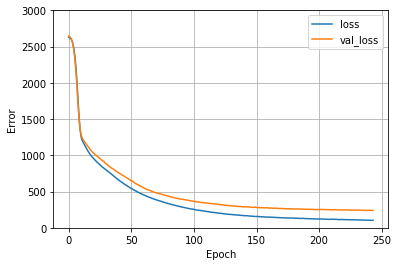

In [22]:
plot_loss(history)

In [10]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [23]:
# retrieve the MAPE on the test set

mean_absolute_percentage_error(test_gspc, dnn_model.predict(test_feature)) #MAPE

8.920365238989419

In [24]:
# RMSE
sqrt(mean_squared_error(dnn_model.predict(test_feature), test_gspc))

344.2987429096365

### tuning

#### 1. Increase the number of hidden layers to 5

In [11]:
# create model
def build_and_compile_model_layer(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),       
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model_layer = build_and_compile_model_layer(normalizer)
dnn_model_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 84)                169       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5440      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [230]:
history_layer = dnn_model_layer.fit(
    train_feature, train_gspc,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

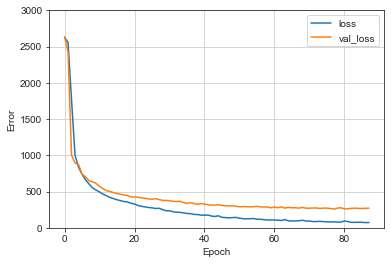

In [231]:
plot_loss(history_layer)

In [232]:
mean_absolute_percentage_error(test_gspc, dnn_model_layer.predict(test_feature)) #MAPE

10.537976173691277

In [125]:
# RMSE
sqrt(mean_squared_error(dnn_model_layer.predict(test_feature), test_gspc))

408.75305747033116

#### 2. Increase the size of each layer to 128

In [115]:
# create model
def build_and_compile_model_size(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),    
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model_size = build_and_compile_model_size(normalizer)
dnn_model_size.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 84)                169       
_________________________________________________________________
dense_233 (Dense)            (None, 128)               10880     
_________________________________________________________________
dense_234 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 129       
Total params: 27,690
Trainable params: 27,521
Non-trainable params: 169
_________________________________________________________________


In [116]:
history_size = dnn_model_size.fit(
    train_feature, train_gspc,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

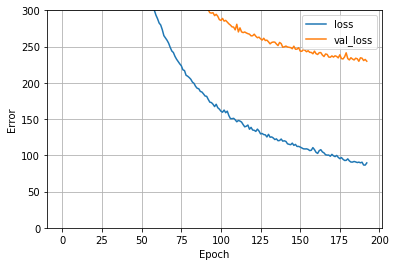

In [117]:
plot_loss(history_size, 300)

In [118]:
# MAPE
mean_absolute_percentage_error(test_gspc, dnn_model_size.predict(test_feature)) 

8.925374707079655

In [119]:
# RMSE
sqrt(mean_squared_error(dnn_model_size.predict(test_feature), test_gspc))

357.616442685152

#### 3. Change the activation function to sigmoid

In [37]:
# create model
def build_and_compile_model_fn(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='sigmoid'),
      layers.Dense(128, activation='sigmoid'),    
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model_fn = build_and_compile_model_fn(normalizer)
dnn_model_fn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 84)                169       
_________________________________________________________________
dense_21 (Dense)             (None, 128)               10880     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 27,690
Trainable params: 27,521
Non-trainable params: 169
_________________________________________________________________


In [38]:
history_fn = dnn_model_fn.fit(
    train_feature, train_gspc,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

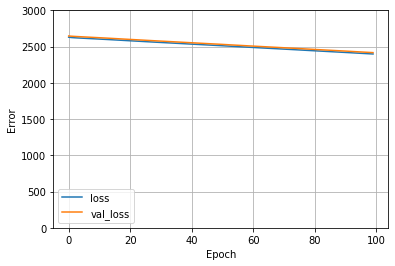

In [39]:
plot_loss(history_fn)

In [40]:
# MAPE
mean_absolute_percentage_error(test_gspc, dnn_model_fn.predict(test_feature)) 

90.94390077768145

In [41]:
# RMSE
sqrt(mean_squared_error(dnn_model_fn.predict(test_feature), test_gspc))

2447.9672901400654

### Adding it all together, increasing number of layers of same type does not help, increasing layer unit helps and sigmoid does not help.

Therefore, we will use a bottleneck architecture of [512,256,128,64] of 2 layers each, and continue with relu activation. Furthermore, based on https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/ , we will introduce Batchnormalization and Dropout layers.

In [12]:
def build_and_compile_model(norm):
    model = keras.Sequential()
    model.add(norm)
    for i in [512,256,128,64]:
        for j in range(2):
            model.add(layers.Dense(i,activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(0.1))
            
    model.add(layers.Dense(1))

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 84)                169       
_________________________________________________________________
dense_9 (Dense)              (None, 512)               43520     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [194]:
history_fn = dnn_model.fit(
    train_feature, train_gspc,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

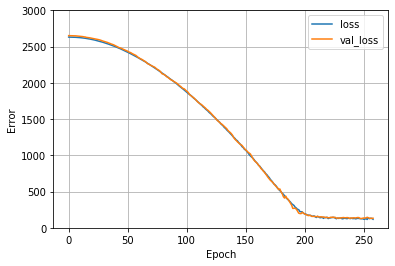

In [195]:
plot_loss(history_fn)

In [196]:
# MAPE
mean_absolute_percentage_error(test_gspc, dnn_model.predict(test_feature)) 

4.845916735949514

In [197]:
# RMSE
sqrt(mean_squared_error(dnn_model.predict(test_feature), test_gspc))

193.54046120706664

## Val/Test data prediction

In [13]:
dnn_model = build_and_compile_model(normalizer)

history_fn = dnn_model.fit(
    train_feature, train_gspc,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

GSPC_pred = dnn_model.predict(test.iloc[:,:-3])

In [14]:
train_ixic = train_dataset['^IXIC']

dnn_model = build_and_compile_model(normalizer)

history_ixic = dnn_model.fit(
    train_feature, train_ixic,
    validation_split=0.2,
    verbose=0, epochs=400,callbacks=[stopper])

IXIC_val = dnn_model.predict(test_feature)
IXIC_pred = dnn_model.predict(test.iloc[:,:-3])

In [15]:
train_vgt = train_dataset['VGT']

dnn_model = build_and_compile_model(normalizer)

history_vgt = dnn_model.fit(
    train_feature, train_vgt,
    validation_split=0.2,
    verbose=0, epochs=500,callbacks=[stopper])

VGT_val = dnn_model.predict(test_feature)
VGT_pred = dnn_model.predict(test.iloc[:,:-3])

In [16]:
GSPC_pred = [x[0] for x in GSPC_pred]
IXIC_pred = [x[0] for x in IXIC_pred]
VGT_pred = [x[0] for x in VGT_pred]

In [17]:
print("GSPC metrics")
print("RMSE: %.3f, MAPE:%.3f"%(sqrt(mean_squared_error(GSPC_pred,test.reset_index()['^GSPC'])),
                               mean_absolute_percentage_error(test.reset_index()['^GSPC'], GSPC_pred)))
print("\n")
print("IXIC metrics")
print("val")
print("RMSE: %.3f, MAPE:%.3f"%(sqrt(mean_squared_error(IXIC_val,test_dataset['^IXIC'])),
                               mean_absolute_percentage_error(test_dataset['^IXIC'], IXIC_val)))
print("test")
print("RMSE: %.3f, MAPE:%.3f"%(sqrt(mean_squared_error(IXIC_pred,test.reset_index()['^IXIC'])),
                               mean_absolute_percentage_error(test.reset_index()['^IXIC'], IXIC_pred)))
print("\n")
print("VGT metrics")
print("val")
print("RMSE: %.3f, MAPE:%.3f"%(sqrt(mean_squared_error(VGT_val,test_dataset['VGT'])),
                               mean_absolute_percentage_error(test_dataset['VGT'], VGT_val)))
print("test")
print("RMSE: %.3f, MAPE:%.3f"%(sqrt(mean_squared_error(VGT_pred,test.reset_index()['VGT'])),
                               mean_absolute_percentage_error(test.reset_index()['VGT'], VGT_pred)))

GSPC metrics
RMSE: 405.704, MAPE:8.714


IXIC metrics
val
RMSE: 797.551, MAPE:7.010
test
RMSE: 2905.028, MAPE:20.870


VGT metrics
val
RMSE: 30.228, MAPE:10.263
test
RMSE: 103.855, MAPE:27.733


In [18]:
# obtain time series plots of acutual prices and forecasts prices for GSPC, IXIC and VGT

def plot_predictions(test,
                     set3_GSPC_pred, set3_IXIC_pred, set3_VGT_pred
                    ):
    import matplotlib.ticker as ticker
    test_df_grouped = test.groupby('market_date').mean().reset_index()
    
    # obtain dataframes that contain predictions and the actual prices
    GSPC_pred_df = pd.DataFrame({'market_date':test_df_grouped['market_date'],
                                  'actual_GSPC':test_df_grouped['^GSPC'],
                                  'set3_GSPC_pred':set3_GSPC_pred
                                 }).set_index('market_date')
    
    IXIC_pred_df = pd.DataFrame({'market_date':test_df_grouped['market_date'],
                                  'actual_IXIC':test_df_grouped['^IXIC'],
                                  'set3_IXIC_pred':set3_IXIC_pred
                                 }).set_index('market_date')
    
    VGT_pred_df = pd.DataFrame({'market_date':test_df_grouped['market_date'],
                                'actual_VGT':test_df_grouped['VGT'],
                                'set3_VGT_pred':set3_VGT_pred
                                }).set_index('market_date')    
    
    # matplotlib and seaborn settings
    sns.set_style("ticks")
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,12))
    plt.subplots_adjust(hspace=0.5)
   
    # generate plots
    GSPC = sns.lineplot(data=GSPC_pred_df, ax=axes[0])
    GSPC.xaxis.set_major_locator(ticker.MultipleLocator(2))
    GSPC.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)
    axes[0].title.set_text("GSPC predictions")
    
    IXIC = sns.lineplot(data=IXIC_pred_df, ax=axes[1])
    IXIC.xaxis.set_major_locator(ticker.MultipleLocator(2))
    IXIC.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)
    axes[1].title.set_text("IXIC predictions")
    
    VGT = sns.lineplot(data=VGT_pred_df, ax=axes[2])
    VGT.xaxis.set_major_locator(ticker.MultipleLocator(2))
    VGT.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)
    axes[2].title.set_text("VGT predictions")
    
    plt.savefig("time_series_prediction.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return GSPC_pred_df, IXIC_pred_df, VGT_pred_df

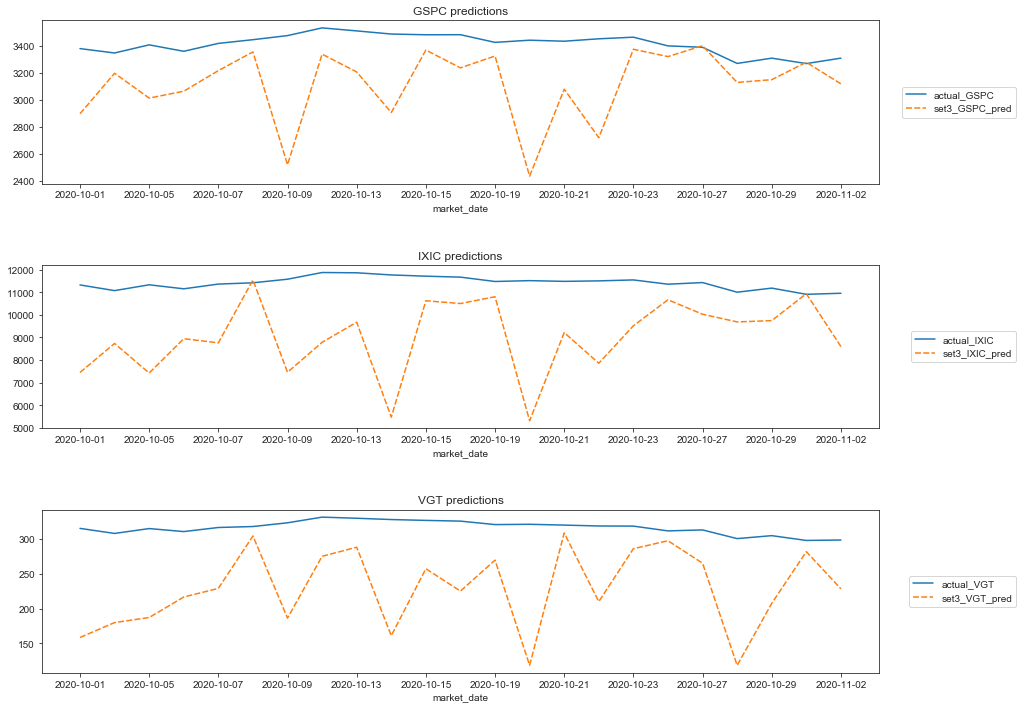

In [19]:
GSPC_pred_df, IXIC_pred_df, VGT_pred_df = plot_predictions(test.reset_index(),
                                                           GSPC_pred, IXIC_pred, VGT_pred
                                                          )

In [12]:
category = ['validation', 'validation', 'validation', 'test', 'test', 'test']
ticker_symbol = ['GSPC', 'IXIC', 'VGT', 'GSPC', 'IXIC', 'VGT']
loss = [4.846, 7.010, 10.263, 8.714, 20.870, 27.733]

loss_summary_df = pd.DataFrame({'category': category, 'loss': loss, 'ticker_symbol':ticker_symbol})
loss_summary_df['feature_set'] = 'feature_set_3'
loss_summary_df['metric'] = 'MAPE'

In [13]:
loss_summary_df

,category,loss,ticker_symbol,feature_set,metric
0,validation,4.846,GSPC,feature_set_3,MAPE
1,validation,7.010,IXIC,feature_set_3,MAPE
2,validation,10.263,VGT,feature_set_3,MAPE
3,test,8.714,GSPC,feature_set_3,MAPE
4,test,20.870,IXIC,feature_set_3,MAPE
5,test,27.733,VGT,feature_set_3,MAPE


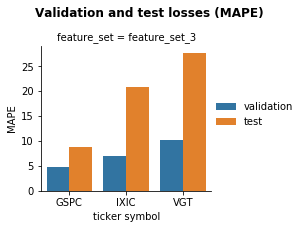

In [14]:
# MAPE
g = sns.FacetGrid(loss_summary_df[loss_summary_df['metric']=='MAPE'], col="feature_set")
g.map_dataframe(sns.barplot, x="ticker_symbol", y="loss", hue="category", palette=["C0", "C1"])
g.set_axis_labels("ticker symbol", "MAPE")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Validation and test losses (MAPE)', fontweight="bold")
plt.savefig("../plots/DNN_validation_test_MAPE.png", dpi=300, bbox_inches='tight')
plt.show()